In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [154]:
cols = ["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [155]:
df["class"].unique()

array(['g', 'h'], dtype=object)

In [156]:
# Other way to convert boolean in a list to o or 1
#df["class"] = df["class"].map({"g": 1, False: 0})
#df["class"] = df["class"].apply(lambda x: int(x == "g"))
df["class"] = (df["class"] == 'g').astype(int)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


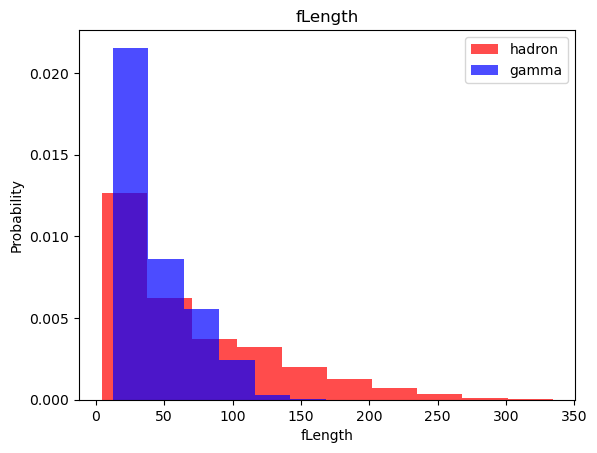

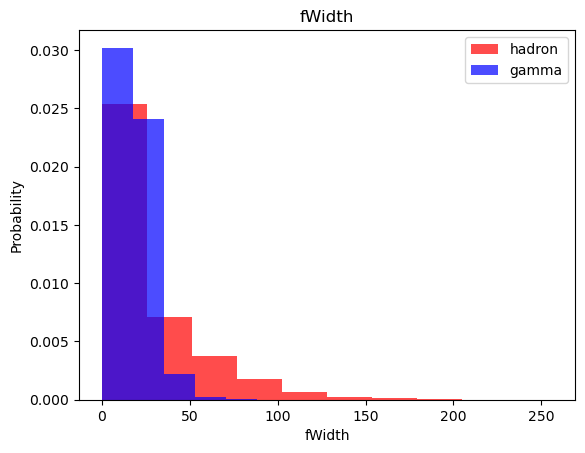

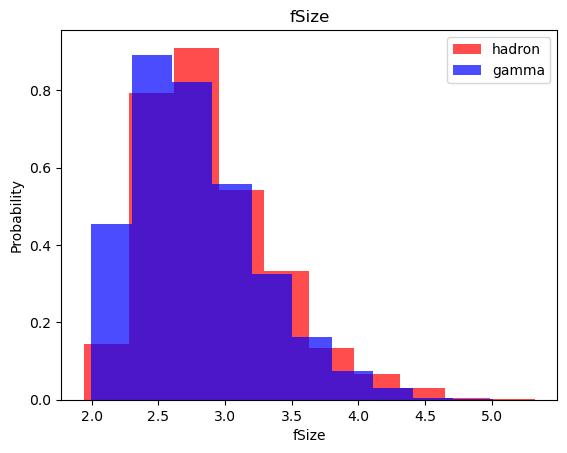

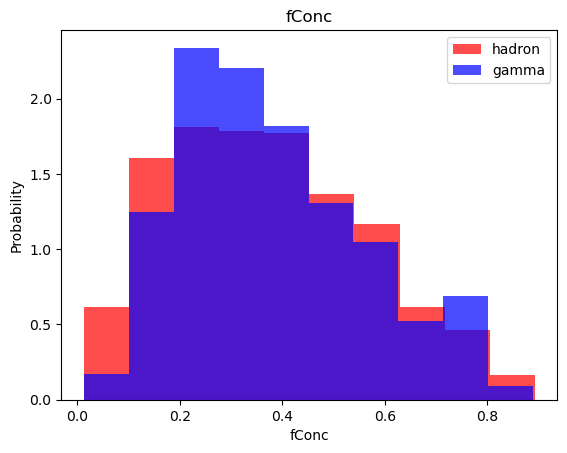

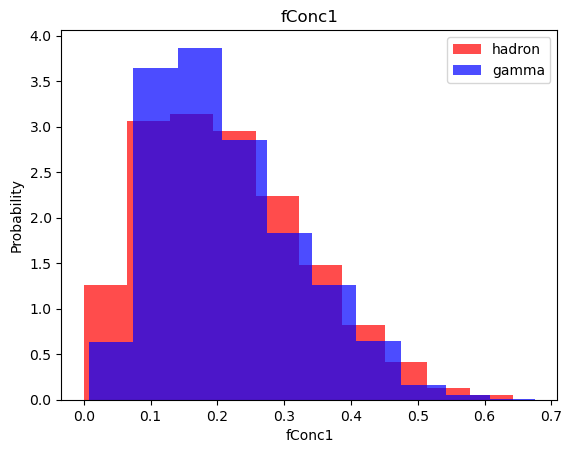

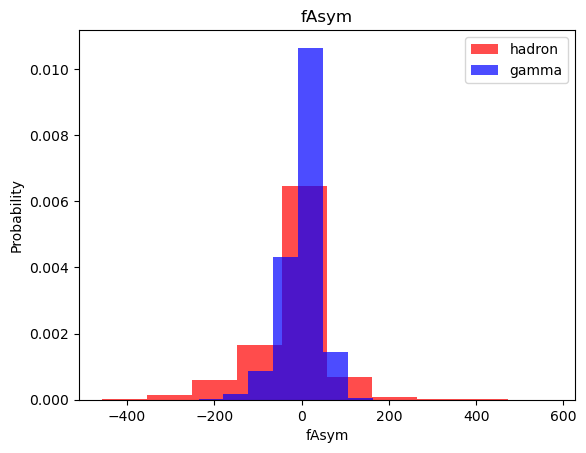

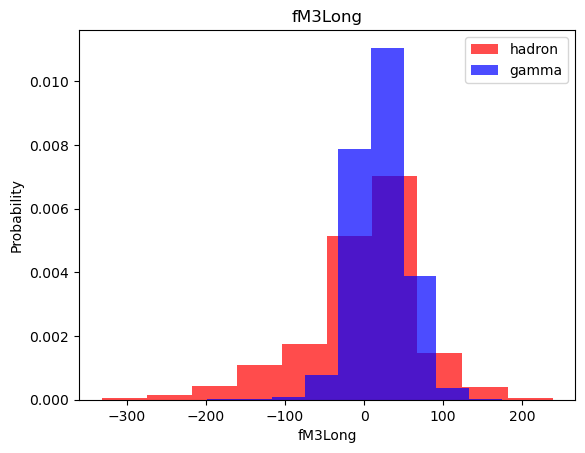

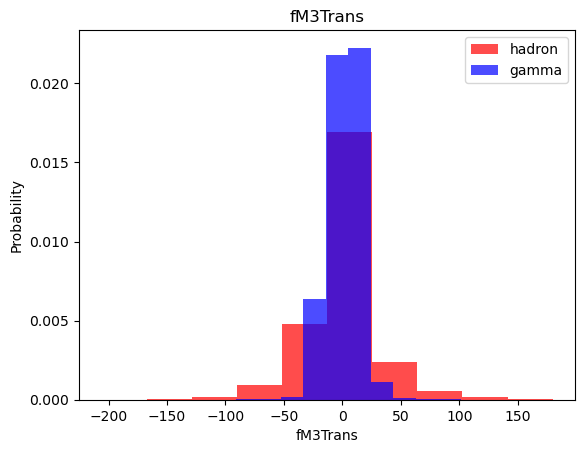

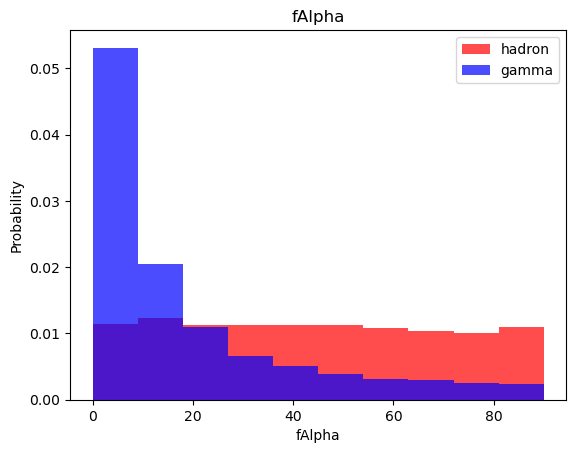

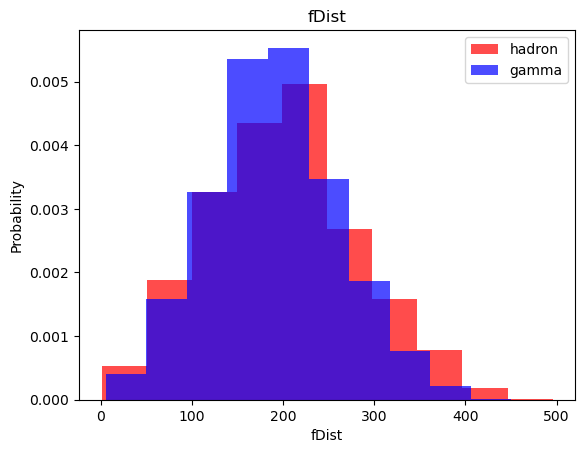

In [157]:
for label in cols[:-1]:
    plt.figure()
    plt.hist(df[df["class"]==0][label], color = "red", label = "hadron", alpha = 0.7, density=True)
    plt.hist(df[df["class"]==1][label], color = "blue", label = "gamma", alpha = 0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [158]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [159]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    scaler = StandardScaler() 
    X = scaler.fit_transform(X)
    if oversample:
        ros = RandomOverSampler()
        X,y = ros.fit_resample(X,y)
    data = np.hstack((X, np.reshape(y,(-1,1))))
    return data , X, y

In [160]:
print(len(train[train[:-1]== 1]))

11412


In [161]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [162]:
print(len(X_train== 1))

14884


In [163]:
#KNN 

In [164]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knn_model = KNeighborsClassifier(n_neighbors = 1)
knn_model.fit(X_train,y_train);

In [165]:
y_pred = knn_model.predict(X_test)

In [166]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.66      0.71      1363
           1       0.82      0.88      0.85      2441

    accuracy                           0.80      3804
   macro avg       0.79      0.77      0.78      3804
weighted avg       0.80      0.80      0.80      3804



In [167]:
# LOGISTIC REGRESSION

In [168]:
from sklearn.linear_model import LogisticRegression

lg_model = LogisticRegression()
lg_model.fit(X_train, y_train);

In [169]:
y_pred = lg_model.predict(X_test)

In [170]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.70      0.69      1363
           1       0.83      0.81      0.82      2441

    accuracy                           0.77      3804
   macro avg       0.75      0.76      0.76      3804
weighted avg       0.78      0.77      0.77      3804



In [171]:
#SVM

In [172]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train);

In [173]:
y_pred = svm_model.predict(X_test)

In [174]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80      1363
           1       0.88      0.90      0.89      2441

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.85      0.86      0.85      3804

